# READ ME

This data set analysis is about diamonds' price evaluation,  based on the following parameters included in the data set, as described below:

   * Carat - weight of the diamond
   * Cut  - quality of the cut (Fair, Good, Very Good, Premium, Ideal)
   * Color - diamond colour, from J (worst) to D (best)
   * Clarity - a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
   * X -  length in mm
   * Y - width in mm
   * Z - depth in m
   * Depth - The height of a diamond
   * Table - The width of the diamond’s table expressed as a percentage of its average diameter



# IMPORT LIBRARIES

In [67]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt, pylab as pylab
from sklearn import *

# EXTRACT FILES
* Loading the data set
* What is inside this dataset?

In [97]:
data_diamonds = pd.read_csv('data/asset-v1 IRONHACK+DAFT+202007_SAO+type@asset+block@diamonds.csv')


In [69]:
data_rick = pd.read_csv('data/asset-v1 IRONHACK+DAPT+202007_SAO+type@asset+block@rick_diamonds.csv')

# DATA PROCESSING
*   Dataset Overview (info, shape, head, describe)
*   Data Cleaning (dealing with null values, drop, etc)
*   Enconding categorial x numerical variables
*   Ranking how important is a variable for the model

In [ ]:
data_diamonds.describe()

In [ ]:
data_diamonds.info()

In [ ]:
data_rick.describe()

In [ ]:
data_rick.info()

# EXPLOTATORY ANALYSIS
* Data comparison 
* Graphic visualization

In [7]:
#finding total price mean
data_diamonds['price'].mean()
data_rick['price_predicted'] = data_diamonds['price'].mean() 

In [73]:
data_diamonds['price'].mean()

3934.409644462607

In [ ]:
# Checking nulls
data_diamonds.isna().sum()

In [8]:
# dropping duplicated rows and filling nulls as '0 'value on ricks'data set 
# Transforming the data set using .mean() to .csv to check on diamonds' website
data_rick = data_rick.drop_duplicates()
data_rick = data_rick.fillna(0)
data_rick.to_csv('data1/asset-v1 IRONHACK+DAPT+202007_SAO+type@asset+block@rick_diamonds.csv')


In [74]:
#checking data_diamonds numeric values through describe method
data_diamonds.describe()

,carat,depth,table,price,x,y,z
count,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000
mean,0.797817,61.751931,57.451161,3934.409644,5.730712,5.734333,3.538648
std,0.474126,1.430026,2.233450,3989.333861,1.121920,1.145344,0.706817
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.690000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5331.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

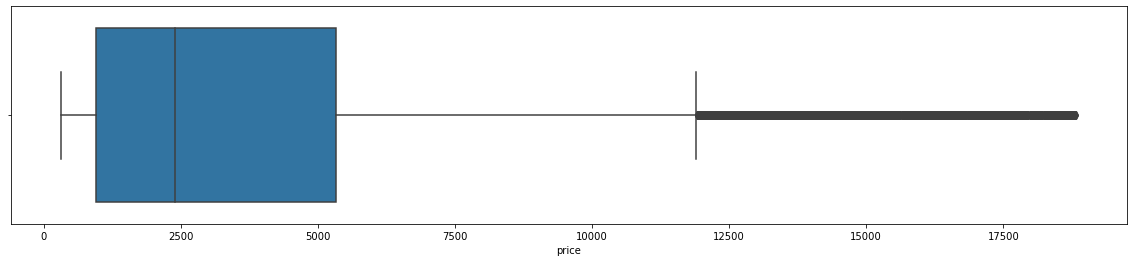

In [75]:
# plotting boxplot to visualize price distribution
fig, ax = plt.subplots(figsize=(20,4))
sns.boxplot(data_diamonds['price'])

# MODEL TRAINING

Using sklearn to train and test models:

  * Setup for features and targets
  * Standard scalar and model regressors
  * Fitting models on training data
  * Checking how important each variable is for the model


In [77]:
#import proper library
# verifying price prefiction according to 'carat' parameter variation
from sklearn.linear_model import LinearRegression
X = data_diamonds[['carat']]
y = data_diamonds['price']
model = LinearRegression()
model.fit(X,y)
x_all = X
y_pred1_all = model.predict(x_all)
y_pred1_all


array([-626.66761002, -471.48055449,   -5.91938791, ..., 3330.60230596,
       3175.41525043, 3563.38288926])

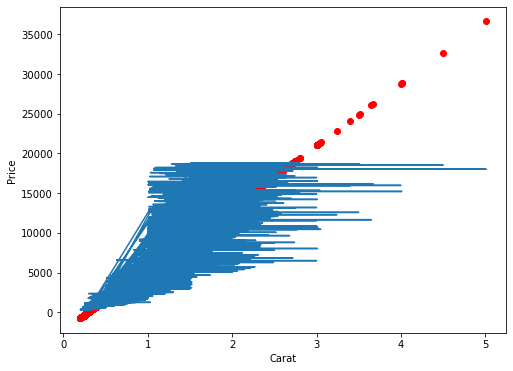

In [78]:
# plotting most correlated 'price' x 'carat' linear regression graphic:
plt.figure(figsize=(8,6))
plt.plot(data_diamonds['carat'],data_diamonds['price'])
plt.scatter(x_all,y_pred1_all, color='red')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()


# DEPLOY

In [98]:
# Transforming the data set using 'price' x 'carat'linear regression to .csv to check on diamonds' websited
# pd.Series was used on y prediction in order to fill missed rows with Nan
# A greater error was found in comparison to data set where mean was used
data_rick['price_predicted'] = pd.Series(y_pred1_all)
data_rick.to_csv('data1/asset-v1 IRONHACK+DAPT+202007_SAO+type@asset+block@rick_diamonds.csv')

# DATA TRANSFORMING and  reapplying MODEL TRAINING
* Convert categories to numerics to check correlations between parameters
* apply model training

In [167]:
# Transforming categories to numerics on 'clarity' parameter:
# Clarity - a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)).
# From worst to best clarity, numerics (1 to 8).

data_diamonds['clarity'] = data_diamonds['clarity'].astype(str).replace('I1','8').replace('SI2','1').replace('SI1','2').replace('VS2','3').replace('VS1','4').replace('VVS2','5').replace('VVS1','6').replace('IF','7').astype(int)


In [168]:
# Transforming categories to numerics on 'cut' parameter:
# Cut - quality of the cut (Fair, Good, Very Good, Premium, Ideal)
# # From worst to best cut, numerics (1 to 5).
data_diamonds['cut'] = data_diamonds['cut'].astype(str).replace('Fair','1').replace('Good','2').replace('Very Good','3').replace('Premium','4').replace('Ideal','5').astype(int)

In [169]:
# Transforming categories to numerics on 'color' parameter:
# Color - diamond colour, from J (worst) to D (best).
# # From worst to best cut, numerics (1 to 5).
data_diamonds['color'] = data_diamonds['color'].astype(str).replace('J','1').replace('I','2').replace('H','3').replace('G','4').replace('F','5').replace('E','6').replace('D','7').astype(int)

In [170]:
# Checking data set after transforming
data_diamonds.sort_values('price', ascending=False).head(10)


,carat,cut,color,clarity,depth,table,price,x,y,z
25152,2.29,4,2,3,60.8,60.0,18823,8.50,8.47,5.16
25151,2.00,3,4,2,63.5,56.0,18818,7.90,7.97,5.04
25150,1.51,5,4,7,61.7,55.0,18806,7.37,7.41,4.56
25149,2.07,5,4,1,62.5,55.0,18804,8.20,8.13,5.11
25148,2.00,3,3,2,62.8,57.0,18803,7.95,8.00,5.01
25147,2.29,4,2,2,61.8,59.0,18797,8.52,8.45,5.24
25146,2.04,4,3,2,58.1,60.0,18795,8.37,8.28,4.84
25145,2.15,5,4,1,62.6,54.0,18791,8.29,8.35,5.21
25144,1.71,4,5,3,62.3,59.0,18791,7.57,7.53,4.70
25143,2.80,2,4,1,63.8,58.0,18788,8.90,8.85,0.00


In [171]:
#Checking correlations between all parameters
#Higher correlations were found from price by carat,x,y and z parameters
data_diamonds.corr()

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,-0.136218,-0.292021,-0.277350,0.027074,0.181688,0.922186,0.975152,0.949687,0.951824
cut,-0.136218,1.000000,0.020318,0.131189,-0.220066,-0.431738,-0.055150,-0.127095,-0.122565,-0.150714
color,-0.292021,0.020318,1.000000,-0.040028,-0.046302,-0.027476,-0.173129,-0.270637,-0.263387,-0.268071
clarity,-0.277350,0.131189,-0.040028,1.000000,-0.020668,-0.131239,-0.143724,-0.302339,-0.292543,-0.294529
depth,0.027074,-0.220066,-0.046302,-0.020668,1.000000,-0.297123,-0.012037,-0.025858,-0.029903,0.094344
table,0.181688,-0.431738,-0.027476,-0.131239,-0.297123,1.000000,0.127832,0.195367,0.183362,0.150646
price,0.922186,-0.055150,-0.173129,-0.143724,-0.012037,0.127832,1.000000,0.885019,0.864059,0.860247
x,0.975152,-0.127095,-0.270637,-0.302339,-0.025858,0.195367,0.885019,1.000000,0.972447,0.969336
y,0.949687,-0.122565,-0.263387,-0.292543,-0.029903,0.183362,0.864059,0.972447,1.000000,0.948768
z,0.951824,-0.150714,-0.268071,-0.294529,0.094344,0.150646,0.860247,0.969336,0.948768,1.000000


In [172]:
# Apply multiple linear regression using chosen parameters with y = 'price' 
X = data_diamonds[['carat','x','y','z']]
y = data_diamonds['price']
model = LinearRegression()
model.fit(X,y)


LinearRegression()

In [173]:
#checking coeficient
model.coef_

array([10241.96217333,  -884.55877431,   148.47196517,  -551.18655735])

In [174]:
#cheking intercept
model.intercept_

1931.4198240020933

# STANDARIZATION
* standarize X parameters to let all at same scale to apply  multiple linear regression
* apply model training

In [175]:
# Import proper sklearn libraries for standarization
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [176]:
# Instance scaler
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [177]:
# Standarize X  and fit model
X_std = scaler.transform(X)
model = LinearRegression()
model.fit(X_std,y)

LinearRegression()

In [178]:
model.coef_

array([4855.92653364, -992.39434502,  170.04969302, -389.58381447])

In [179]:
model.intercept_

3934.4096444626057

In [180]:
# check the coeficient error using score method
model.score(X_std,y)

0.8551826548717094

In [181]:
# check predicted price after standarization
x_all = X_std
y_pred_std_all = model.predict(x_all)
y_pred_std_all


array([ -61.81035291,   35.64803866,  364.85776899, ..., 3136.42349064,
       2975.28730071, 3321.12516654])

# REDEPLOY

In [183]:
#checking rick data set after price predicted update
# pd.Series was used on y prediction in order to fill missed rows with Nan
data_rick['price_predicted'] = pd.Series(y_pred_std_all)
data_rick

,carat,cut,color,clarity,depth,table,x,y,z,price_predicted
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,-61.810353
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,35.648039
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,364.857769
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,397.533033
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,125.335495
...,...,...,...,...,...,...,...,...,...,...
4995,0.30,Very Good,D,SI2,62.2,59.0,4.25,4.30,2.66,4486.218076
4996,0.51,Ideal,F,VVS2,61.9,56.0,5.09,5.14,3.16,6072.898695
4997,1.01,Very Good,F,SI1,60.6,60.0,6.37,6.43,3.88,4508.298842
4998,0.31,Ideal,F,VVS1,62.1,56.0,4.35,4.38,2.71,4615.172623


In [184]:
# Transforming the data set using 'price' x 'carat'linear regression to .csv to check on diamonds' websited
data_rick.to_csv('data1/asset-v1 IRONHACK+DAPT+202007_SAO+type@asset+block@rick_diamonds.csv')
